# Investigation combination of weather and energy outlier days

## Uploading the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd


In [20]:
file_path = "/Users/agetman/Desktop/Twork/energyThesis/data/from_V1/df_with_outliers.pkl"
df_V1 = pd.read_pickle(file_path)
df_V1

,EAN_ID,Date_StartHour,Date,Volume_Consumption_kWh,Volume_Injection_kWh,Heat_Pump_Indicator,Electric_Vehicle_Indicator,PV_Installation_Indicator,Contract_Category,Day,...,Day_of_Week_Num,Is_Weekend,Day_Type,date,temperature_2m,relative_humidity_2m,precipitation,cloud_cover,wind_speed_10m,Outlier_Day
0,1,2022-01-01 00:00:00+00:00,2022-01-01,3.471,0.0,0,1,0,Residentieel,1,...,5,1,Holiday,2022-01-01 00:00:00+00:00,12.65,85.893170,0.0,67.5,14.618837,0
1,1,2022-01-01 01:00:00+00:00,2022-01-01,2.409,0.0,0,1,0,Residentieel,1,...,5,1,Holiday,2022-01-01 01:00:00+00:00,11.45,91.414560,0.0,90.0,15.546833,0
2,1,2022-01-01 02:00:00+00:00,2022-01-01,0.616,0.0,0,1,0,Residentieel,1,...,5,1,Holiday,2022-01-01 02:00:00+00:00,10.90,94.492230,0.0,10.8,15.778516,0
3,1,2022-01-01 03:00:00+00:00,2022-01-01,0.658,0.0,0,1,0,Residentieel,1,...,5,1,Holiday,2022-01-01 03:00:00+00:00,10.45,95.109090,0.0,61.2,15.294704,0
4,1,2022-01-01 04:00:00+00:00,2022-01-01,0.449,0.0,0,1,0,Residentieel,1,...,5,1,Holiday,2022-01-01 04:00:00+00:00,10.95,94.494340,0.0,100.0,15.294704,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11387995,1300,2022-12-31 19:00:00+00:00,2022-12-31,1.966,0.0,0,1,1,Residentieel,31,...,5,1,Weekend,2022-12-31 19:00:00+00:00,16.35,51.750557,0.0,100.0,37.641953,0
11387996,1300,2022-12-31 20:00:00+00:00,2022-12-31,3.948,0.0,0,1,1,Residentieel,31,...,5,1,Weekend,2022-12-31 20:00:00+00:00,16.45,49.850815,0.0,98.4,38.141315,0
11387997,1300,2022-12-31 21:00:00+00:00,2022-12-31,1.120,0.0,0,1,1,Residentieel,31,...,5,1,Weekend,2022-12-31 21:00:00+00:00,16.30,51.737160,0.0,100.0,37.252610,0
11387998,1300,2022-12-31 22:00:00+00:00,2022-12-31,1.212,0.0,0,1,1,Residentieel,31,...,5,1,Weekend,2022-12-31 22:00:00+00:00,15.90,51.950000,0.0,10.0,38.600000,0


In [21]:
file_path = "/Users/agetman/Desktop/Twork/energyThesis/data/from_V1/df_weather_outlier_detailed.pkl"
df_weather_outlier = pd.read_pickle(file_path)
df_weather_outlier

,Date,temperature_2m_i,relative_humidity_2m_i,precipitation_i,wind_speed_10m_i,cloud_cover_i,Weather_Outlier_Day,temperature_2m,relative_humidity_2m,precipitation,...,Temp_Category,Precip_Category,Humidity_Category,Windspeed_Category,Cloudcover_Category,DER_Combination_No_Solar,DER_Combination_No_Solar_+_EV,DER_Combination_Solar_+_EV,DER_Combination_Solar_+_Heat_Pump,DER_Combination_Solar_Only
0,2022-01-01,0,0,0,0,1,1,11.950000,85.319515,0.008333,...,Mild,No Rain,High,Strong,Mostly Cloudy,9.352903,19.909509,20.368167,16.713376,10.611333
1,2022-01-02,0,0,0,0,1,1,11.545833,83.305570,0.312500,...,Mild,Light Rain,High,Strong,Mostly Cloudy,9.963760,21.413888,21.719530,19.608249,11.901827
2,2022-01-05,0,0,0,0,1,1,4.137500,79.075873,0.166667,...,Cold,Light Rain,High,Strong,Mostly Cloudy,10.047632,24.013961,26.891650,29.351898,13.619346
3,2022-02-04,1,0,0,0,0,1,6.210417,84.229656,0.108333,...,Cold,Light Rain,High,Strong,Mostly Cloudy,9.114580,24.495833,25.177513,26.058920,12.168277
4,2022-02-07,0,0,0,1,0,1,5.245833,71.389592,0.045833,...,Cold,No Rain,Moderate,Strong,Partly Cloudy,9.037841,22.703072,22.475864,21.787913,10.366313
5,2022-02-10,0,0,0,0,1,1,5.527083,91.913268,0.120833,...,Cold,Light Rain,Very High,Moderate,Overcast,9.052799,23.083090,23.295824,25.378102,12.027619
6,2022-02-11,0,0,0,0,1,1,3.708333,79.253139,0.012500,...,Cold,No Rain,High,Fresh,Clear,8.974003,22.963283,21.816280,23.670425,10.627330
7,2022-02-18,0,1,0,0,0,1,8.768750,73.633133,0.137500,...,Mild,Light Rain,Moderate,Strong,Mostly Cloudy,8.791240,23.555875,22.910391,22.576679,11.617897
8,2022-02-25,0,0,0,0,1,1,4.325000,72.653121,0.075000,...,Cold,No Rain,Moderate,Strong,Clear,8.885959,25.539252,21.513149,23.518395,10.025172
9,2022-03-13,1,0,0,0,0,1,11.518750,65.225489,0.000000,...,Mild,No Rain,Low,Strong,Overcast,9.235460,20.373651,18.574683,12.906337,7.754123


In [23]:
# Merge datasets on 'Date'
df_full_H = df_V1.merge(df_weather_outlier[['Date', 'Weather_Outlier_Day']], on='Date', how='left')

# Fill NaN values with 0
df_full_H['Weather_Outlier_Day'] = df_full_H['Weather_Outlier_Day'].fillna(0)

# Convert 1.0 to 1
df_full_H['Weather_Outlier_Day'] = df_full_H['Weather_Outlier_Day'].astype(int)
df_full_H

,EAN_ID,Date_StartHour,Date,Volume_Consumption_kWh,Volume_Injection_kWh,Heat_Pump_Indicator,Electric_Vehicle_Indicator,PV_Installation_Indicator,Contract_Category,Day,...,Is_Weekend,Day_Type,date,temperature_2m,relative_humidity_2m,precipitation,cloud_cover,wind_speed_10m,Outlier_Day,Weather_Outlier_Day
0,1,2022-01-01 00:00:00+00:00,2022-01-01,3.471,0.0,0,1,0,Residentieel,1,...,1,Holiday,2022-01-01 00:00:00+00:00,12.65,85.893170,0.0,67.5,14.618837,0,1
1,1,2022-01-01 01:00:00+00:00,2022-01-01,2.409,0.0,0,1,0,Residentieel,1,...,1,Holiday,2022-01-01 01:00:00+00:00,11.45,91.414560,0.0,90.0,15.546833,0,1
2,1,2022-01-01 02:00:00+00:00,2022-01-01,0.616,0.0,0,1,0,Residentieel,1,...,1,Holiday,2022-01-01 02:00:00+00:00,10.90,94.492230,0.0,10.8,15.778516,0,1
3,1,2022-01-01 03:00:00+00:00,2022-01-01,0.658,0.0,0,1,0,Residentieel,1,...,1,Holiday,2022-01-01 03:00:00+00:00,10.45,95.109090,0.0,61.2,15.294704,0,1
4,1,2022-01-01 04:00:00+00:00,2022-01-01,0.449,0.0,0,1,0,Residentieel,1,...,1,Holiday,2022-01-01 04:00:00+00:00,10.95,94.494340,0.0,100.0,15.294704,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11387995,1300,2022-12-31 19:00:00+00:00,2022-12-31,1.966,0.0,0,1,1,Residentieel,31,...,1,Weekend,2022-12-31 19:00:00+00:00,16.35,51.750557,0.0,100.0,37.641953,0,1
11387996,1300,2022-12-31 20:00:00+00:00,2022-12-31,3.948,0.0,0,1,1,Residentieel,31,...,1,Weekend,2022-12-31 20:00:00+00:00,16.45,49.850815,0.0,98.4,38.141315,0,1
11387997,1300,2022-12-31 21:00:00+00:00,2022-12-31,1.120,0.0,0,1,1,Residentieel,31,...,1,Weekend,2022-12-31 21:00:00+00:00,16.30,51.737160,0.0,100.0,37.252610,0,1
11387998,1300,2022-12-31 22:00:00+00:00,2022-12-31,1.212,0.0,0,1,1,Residentieel,31,...,1,Weekend,2022-12-31 22:00:00+00:00,15.90,51.950000,0.0,10.0,38.600000,0,1


In [24]:
df_full_H

,EAN_ID,Date_StartHour,Date,Volume_Consumption_kWh,Volume_Injection_kWh,Heat_Pump_Indicator,Electric_Vehicle_Indicator,PV_Installation_Indicator,Contract_Category,Day,...,Is_Weekend,Day_Type,date,temperature_2m,relative_humidity_2m,precipitation,cloud_cover,wind_speed_10m,Outlier_Day,Weather_Outlier_Day
0,1,2022-01-01 00:00:00+00:00,2022-01-01,3.471,0.0,0,1,0,Residentieel,1,...,1,Holiday,2022-01-01 00:00:00+00:00,12.65,85.893170,0.0,67.5,14.618837,0,1
1,1,2022-01-01 01:00:00+00:00,2022-01-01,2.409,0.0,0,1,0,Residentieel,1,...,1,Holiday,2022-01-01 01:00:00+00:00,11.45,91.414560,0.0,90.0,15.546833,0,1
2,1,2022-01-01 02:00:00+00:00,2022-01-01,0.616,0.0,0,1,0,Residentieel,1,...,1,Holiday,2022-01-01 02:00:00+00:00,10.90,94.492230,0.0,10.8,15.778516,0,1
3,1,2022-01-01 03:00:00+00:00,2022-01-01,0.658,0.0,0,1,0,Residentieel,1,...,1,Holiday,2022-01-01 03:00:00+00:00,10.45,95.109090,0.0,61.2,15.294704,0,1
4,1,2022-01-01 04:00:00+00:00,2022-01-01,0.449,0.0,0,1,0,Residentieel,1,...,1,Holiday,2022-01-01 04:00:00+00:00,10.95,94.494340,0.0,100.0,15.294704,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11387995,1300,2022-12-31 19:00:00+00:00,2022-12-31,1.966,0.0,0,1,1,Residentieel,31,...,1,Weekend,2022-12-31 19:00:00+00:00,16.35,51.750557,0.0,100.0,37.641953,0,1
11387996,1300,2022-12-31 20:00:00+00:00,2022-12-31,3.948,0.0,0,1,1,Residentieel,31,...,1,Weekend,2022-12-31 20:00:00+00:00,16.45,49.850815,0.0,98.4,38.141315,0,1
11387997,1300,2022-12-31 21:00:00+00:00,2022-12-31,1.120,0.0,0,1,1,Residentieel,31,...,1,Weekend,2022-12-31 21:00:00+00:00,16.30,51.737160,0.0,100.0,37.252610,0,1
11387998,1300,2022-12-31 22:00:00+00:00,2022-12-31,1.212,0.0,0,1,1,Residentieel,31,...,1,Weekend,2022-12-31 22:00:00+00:00,15.90,51.950000,0.0,10.0,38.600000,0,1


In [25]:
# Rename the column
df_full_H = df_full_H.rename(columns={'Outlier_Day': 'Energy_Outlier_Day'})


In [26]:
# Step 2: Ensure 'DER_Combination' column exists as before
def der_combo_restricted(row):
    hp = row['Heat_Pump_Indicator']
    ev = row['Electric_Vehicle_Indicator']
    pv = row['PV_Installation_Indicator']
    if (pv == 1) and (hp == 0) and (ev == 0):
        return "Solar Only"
    elif (pv == 0) and (hp == 0) and (ev == 0):
        return "No Solar"
    elif (pv == 1) and (hp == 1) and (ev == 0):
        return "Solar + Heat Pump"
    elif (pv == 1) and (hp == 0) and (ev == 1):
        return "Solar + EV"
    elif (pv == 0) and (hp == 0) and (ev == 1):
        return "No Solar + EV"
    else:
        return None

# Assign combination if not already present
if 'DER_Combination' not in df_full_H:
    df_full_H['DER_Combination'] = df_full_H.apply(der_combo_restricted, axis=1)
df_full_H['DER_Combination'].unique()

array(['No Solar + EV', 'No Solar', 'Solar + EV', 'Solar Only',
       'Solar + Heat Pump'], dtype=object)

In [27]:
import os
save_dir = os.path.join("/Users/agetman/Desktop/Twork/energyThesis/data/from_V1")
os.makedirs(save_dir, exist_ok=True)
# Save df_full_H as a pickle file without specifying compression
df_full_H.to_pickle(os.path.join(save_dir, "df_full_H.pkl"))
print(f"DataFrame saved to {save_dir} with all data types preserved")

DataFrame saved to /Users/agetman/Desktop/Twork/energyThesis/data/from_V1 with all data types preserved


In [28]:
df_full_H.columns

Index(['EAN_ID', 'Date_StartHour', 'Date', 'Volume_Consumption_kWh',
       'Volume_Injection_kWh', 'Heat_Pump_Indicator',
       'Electric_Vehicle_Indicator', 'PV_Installation_Indicator',
       'Contract_Category', 'Day', 'Month', 'Year', 'Day_of_Week_Name',
       'With_HeatPump_Solar', 'With_Solar_EV', 'Without_Solar_With_EV', 'Hour',
       'Is_Holiday', 'Holiday_Name', 'School_Holiday_Name',
       'Is_School_Holiday', 'Season', 'Day_of_Week_Num', 'Is_Weekend',
       'Day_Type', 'date', 'temperature_2m', 'relative_humidity_2m',
       'precipitation', 'cloud_cover', 'wind_speed_10m', 'Energy_Outlier_Day',
       'Weather_Outlier_Day', 'DER_Combination'],
      dtype='object')

In [29]:
df_full_H

,EAN_ID,Date_StartHour,Date,Volume_Consumption_kWh,Volume_Injection_kWh,Heat_Pump_Indicator,Electric_Vehicle_Indicator,PV_Installation_Indicator,Contract_Category,Day,...,Day_Type,date,temperature_2m,relative_humidity_2m,precipitation,cloud_cover,wind_speed_10m,Energy_Outlier_Day,Weather_Outlier_Day,DER_Combination
0,1,2022-01-01 00:00:00+00:00,2022-01-01,3.471,0.0,0,1,0,Residentieel,1,...,Holiday,2022-01-01 00:00:00+00:00,12.65,85.893170,0.0,67.5,14.618837,0,1,No Solar + EV
1,1,2022-01-01 01:00:00+00:00,2022-01-01,2.409,0.0,0,1,0,Residentieel,1,...,Holiday,2022-01-01 01:00:00+00:00,11.45,91.414560,0.0,90.0,15.546833,0,1,No Solar + EV
2,1,2022-01-01 02:00:00+00:00,2022-01-01,0.616,0.0,0,1,0,Residentieel,1,...,Holiday,2022-01-01 02:00:00+00:00,10.90,94.492230,0.0,10.8,15.778516,0,1,No Solar + EV
3,1,2022-01-01 03:00:00+00:00,2022-01-01,0.658,0.0,0,1,0,Residentieel,1,...,Holiday,2022-01-01 03:00:00+00:00,10.45,95.109090,0.0,61.2,15.294704,0,1,No Solar + EV
4,1,2022-01-01 04:00:00+00:00,2022-01-01,0.449,0.0,0,1,0,Residentieel,1,...,Holiday,2022-01-01 04:00:00+00:00,10.95,94.494340,0.0,100.0,15.294704,0,1,No Solar + EV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11387995,1300,2022-12-31 19:00:00+00:00,2022-12-31,1.966,0.0,0,1,1,Residentieel,31,...,Weekend,2022-12-31 19:00:00+00:00,16.35,51.750557,0.0,100.0,37.641953,0,1,Solar + EV
11387996,1300,2022-12-31 20:00:00+00:00,2022-12-31,3.948,0.0,0,1,1,Residentieel,31,...,Weekend,2022-12-31 20:00:00+00:00,16.45,49.850815,0.0,98.4,38.141315,0,1,Solar + EV
11387997,1300,2022-12-31 21:00:00+00:00,2022-12-31,1.120,0.0,0,1,1,Residentieel,31,...,Weekend,2022-12-31 21:00:00+00:00,16.30,51.737160,0.0,100.0,37.252610,0,1,Solar + EV
11387998,1300,2022-12-31 22:00:00+00:00,2022-12-31,1.212,0.0,0,1,1,Residentieel,31,...,Weekend,2022-12-31 22:00:00+00:00,15.90,51.950000,0.0,10.0,38.600000,0,1,Solar + EV


In [30]:
import pandas as pd

# Columns to sum
sum_columns = ['Volume_Consumption_kWh', 'Volume_Injection_kWh']

# Weather variables to average
weather_variables = ['temperature_2m', 'relative_humidity_2m', 'precipitation', 'cloud_cover', 'wind_speed_10m']

# Other constant columns to keep as first
constant_columns = [
    'EAN_ID', 'Date', 'Heat_Pump_Indicator', 'Electric_Vehicle_Indicator', 
    'PV_Installation_Indicator', 'Contract_Category', 'Day', 'Month', 'Year', 'Day_of_Week_Name', 
    'With_HeatPump_Solar', 'With_Solar_EV', 'Without_Solar_With_EV', 'Hour', 'Is_Holiday', 'Holiday_Name', 
    'School_Holiday_Name', 'Is_School_Holiday', 'Season', 'Day_of_Week_Num', 'Is_Weekend', 'Day_Type', 
    'date', 'Energy_Outlier_Day', 'Weather_Outlier_Day','DER_Combination'
]

# Create the aggregation dictionary
agg_dict = {col: 'first' for col in constant_columns}  # Keep first for categorical/constant vars
agg_dict.update({col: 'sum' for col in sum_columns})  # Sum energy variables
agg_dict.update({col: 'mean' for col in weather_variables})  # Average weather variables

# Perform the grouping and aggregation
df_grouped = df_full_H.groupby(['EAN_ID', 'Date'], as_index=False).agg(agg_dict)

# Verify the result
df_grouped

,EAN_ID,Date,Heat_Pump_Indicator,Electric_Vehicle_Indicator,PV_Installation_Indicator,Contract_Category,Day,Month,Year,Day_of_Week_Name,...,Energy_Outlier_Day,Weather_Outlier_Day,DER_Combination,Volume_Consumption_kWh,Volume_Injection_kWh,temperature_2m,relative_humidity_2m,precipitation,cloud_cover,wind_speed_10m
0,1,2022-01-01,0,1,0,Residentieel,1,1,2022,Saturday,...,0,1,No Solar + EV,38.319,0.000,11.950000,85.319515,0.008333,57.195836,16.741252
1,1,2022-01-02,0,1,0,Residentieel,2,1,2022,Sunday,...,0,1,No Solar + EV,28.035,0.000,11.545833,83.305570,0.312500,68.804169,25.140911
2,1,2022-01-03,0,1,0,Residentieel,3,1,2022,Monday,...,0,0,No Solar + EV,32.127,0.000,8.816667,87.984144,0.179167,70.883335,22.997987
3,1,2022-01-04,0,1,0,Residentieel,4,1,2022,Tuesday,...,0,0,No Solar + EV,33.375,0.000,6.627083,90.103062,0.229167,97.316668,14.128030
4,1,2022-01-05,0,1,0,Residentieel,5,1,2022,Wednesday,...,0,1,No Solar + EV,28.703,0.000,4.137500,79.075873,0.166667,55.583333,21.068452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474495,1300,2022-12-27,0,1,1,Residentieel,27,12,2022,Tuesday,...,0,1,Solar + EV,14.692,6.670,5.256250,84.969415,0.012500,44.183334,20.171731
474496,1300,2022-12-28,0,1,1,Residentieel,28,12,2022,Wednesday,...,0,0,Solar + EV,17.499,0.000,9.079167,86.765895,0.212500,97.870833,30.359464
474497,1300,2022-12-29,0,1,1,Residentieel,29,12,2022,Thursday,...,0,0,Solar + EV,22.014,1.266,8.875000,82.845296,0.050000,66.087500,29.935795
474498,1300,2022-12-30,0,1,1,Residentieel,30,12,2022,Friday,...,0,0,Solar + EV,19.767,0.000,8.895833,88.150897,0.225000,76.891667,26.497690


In [31]:
import os
save_dir = os.path.join("/Users/agetman/Desktop/Twork/energyThesis/data/from_V1")
os.makedirs(save_dir, exist_ok=True)
# Save df_full_H as a pickle file without specifying compression
df_grouped.to_pickle(os.path.join(save_dir, "df_full_EAN_ID_D.pkl"))
print(f"DataFrame saved to {save_dir} with all data types preserved")

DataFrame saved to /Users/agetman/Desktop/Twork/energyThesis/data/from_V1 with all data types preserved


# ChatGPT results

In [135]:
# Step 1: Aggregate by Date to see if *any* EAN_ID* was flagged as an outlier on each day
df_date_outliers = df_grouped.groupby('Date').agg({
    'Energy_Outlier_Day': 'max',      # 1 if any EAN_ID flagged on that date
    'Weather_Outlier_Day': 'max'      # same for weather
}).reset_index()
df_date_outliers

,Date,Energy_Outlier_Day,Weather_Outlier_Day
0,2022-01-01,1,1
1,2022-01-02,1,1
2,2022-01-03,1,0
3,2022-01-04,1,0
4,2022-01-05,1,1
...,...,...,...
360,2022-12-27,1,1
361,2022-12-28,1,0
362,2022-12-29,1,0
363,2022-12-30,1,0


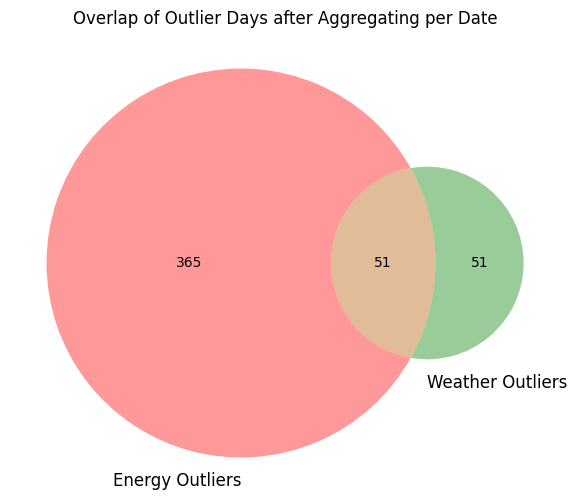

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Step 1: Aggregate by Date to see if *any* EAN_ID* was flagged as an outlier on each day
df_date_outliers = df_grouped.groupby('Date').agg({
    'Energy_Outlier_Day': 'max',      # 1 if any EAN_ID flagged on that date
    'Weather_Outlier_Day': 'max'      # same for weather
}).reset_index()

# Step 2: Count the number of days flagged as outliers
energy_outliers = df_date_outliers['Energy_Outlier_Day'].sum()
weather_outliers = df_date_outliers['Weather_Outlier_Day'].sum()
overlap_outliers = (
    (df_date_outliers['Energy_Outlier_Day'] == 1) &
    (df_date_outliers['Weather_Outlier_Day'] == 1)
).sum()

# Step 3: Plot Venn diagram
plt.figure(figsize=(8, 6))
venn2(
    subsets=(energy_outliers, weather_outliers, overlap_outliers),
    set_labels=('Energy Outliers', 'Weather Outliers')
)
plt.title('Overlap of Outlier Days after Aggregating per Date')
plt.show()


In [14]:
df_grouped['Outlier_Category'] = df_grouped.apply(
    lambda row: 'Both Outliers' if row['Energy_Outlier_Day'] == 1 and row['Weather_Outlier_Day'] == 1 
    else 'Energy only' if row['Energy_Outlier_Day'] == 1 else 'Weather only' if row['Weather_Outlier_Day'] == 1 
    else 'None',
    axis=1
)
df_grouped

,EAN_ID,Date,Heat_Pump_Indicator,Electric_Vehicle_Indicator,PV_Installation_Indicator,Contract_Category,Day,Month,Year,Day_of_Week_Name,...,DER_Combination,Temp_Category,Volume_Consumption_kWh,Volume_Injection_kWh,temperature_2m,relative_humidity_2m,precipitation,cloud_cover,wind_speed_10m,Outlier_Category
0,1,2022-01-01,0,1,0,Residentieel,1,1,2022,Saturday,...,No Solar + EV,Mild,38.319,0.000,11.950000,85.319515,0.008333,57.195836,16.741252,Weather only
1,1,2022-01-02,0,1,0,Residentieel,2,1,2022,Sunday,...,No Solar + EV,Mild,28.035,0.000,11.545833,83.305570,0.312500,68.804169,25.140911,Weather only
2,1,2022-01-03,0,1,0,Residentieel,3,1,2022,Monday,...,No Solar + EV,NaN,32.127,0.000,8.816667,87.984144,0.179167,70.883335,22.997987,None
3,1,2022-01-04,0,1,0,Residentieel,4,1,2022,Tuesday,...,No Solar + EV,NaN,33.375,0.000,6.627083,90.103062,0.229167,97.316668,14.128030,None
4,1,2022-01-05,0,1,0,Residentieel,5,1,2022,Wednesday,...,No Solar + EV,Cold,28.703,0.000,4.137500,79.075873,0.166667,55.583333,21.068452,Weather only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474495,1300,2022-12-27,0,1,1,Residentieel,27,12,2022,Tuesday,...,Solar + EV,Cold,14.692,6.670,5.256250,84.969415,0.012500,44.183334,20.171731,Weather only
474496,1300,2022-12-28,0,1,1,Residentieel,28,12,2022,Wednesday,...,Solar + EV,NaN,17.499,0.000,9.079167,86.765895,0.212500,97.870833,30.359464,None
474497,1300,2022-12-29,0,1,1,Residentieel,29,12,2022,Thursday,...,Solar + EV,NaN,22.014,1.266,8.875000,82.845296,0.050000,66.087500,29.935795,None
474498,1300,2022-12-30,0,1,1,Residentieel,30,12,2022,Friday,...,Solar + EV,NaN,19.767,0.000,8.895833,88.150897,0.225000,76.891667,26.497690,None


In [15]:
# Step 1: Aggregate by Date to see if *any* EAN_ID* was flagged as an outlier on each day
df_date_outliers = df_grouped.groupby('Date').agg({
    'Energy_Outlier_Day': 'sum',      # 1 if any EAN_ID flagged on that date
    'Weather_Outlier_Day': 'first'      # same for weather
}).reset_index()
df_date_outliers

,Date,Energy_Outlier_Day,Weather_Outlier_Day
0,2022-01-01,25,1
1,2022-01-02,35,1
2,2022-01-03,24,0
3,2022-01-04,13,0
4,2022-01-05,12,1
...,...,...,...
360,2022-12-27,20,1
361,2022-12-28,21,0
362,2022-12-29,21,0
363,2022-12-30,27,0


In [136]:
df_grouped

,EAN_ID,Date,Heat_Pump_Indicator,Electric_Vehicle_Indicator,PV_Installation_Indicator,Contract_Category,Day,Month,Year,Day_of_Week_Name,...,Energy_Outlier_Day,Weather_Outlier_Day,DER_Combination,Volume_Consumption_kWh,Volume_Injection_kWh,temperature_2m,relative_humidity_2m,precipitation,cloud_cover,wind_speed_10m
0,1,2022-01-01,0,1,0,Residentieel,1,1,2022,Saturday,...,0,1,No Solar + EV,38.319,0.000,11.950000,85.319515,0.008333,57.195836,16.741252
1,1,2022-01-02,0,1,0,Residentieel,2,1,2022,Sunday,...,0,1,No Solar + EV,28.035,0.000,11.545833,83.305570,0.312500,68.804169,25.140911
2,1,2022-01-03,0,1,0,Residentieel,3,1,2022,Monday,...,0,0,No Solar + EV,32.127,0.000,8.816667,87.984144,0.179167,70.883335,22.997987
3,1,2022-01-04,0,1,0,Residentieel,4,1,2022,Tuesday,...,0,0,No Solar + EV,33.375,0.000,6.627083,90.103062,0.229167,97.316668,14.128030
4,1,2022-01-05,0,1,0,Residentieel,5,1,2022,Wednesday,...,0,1,No Solar + EV,28.703,0.000,4.137500,79.075873,0.166667,55.583333,21.068452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474495,1300,2022-12-27,0,1,1,Residentieel,27,12,2022,Tuesday,...,0,1,Solar + EV,14.692,6.670,5.256250,84.969415,0.012500,44.183334,20.171731
474496,1300,2022-12-28,0,1,1,Residentieel,28,12,2022,Wednesday,...,0,0,Solar + EV,17.499,0.000,9.079167,86.765895,0.212500,97.870833,30.359464
474497,1300,2022-12-29,0,1,1,Residentieel,29,12,2022,Thursday,...,0,0,Solar + EV,22.014,1.266,8.875000,82.845296,0.050000,66.087500,29.935795
474498,1300,2022-12-30,0,1,1,Residentieel,30,12,2022,Friday,...,0,0,Solar + EV,19.767,0.000,8.895833,88.150897,0.225000,76.891667,26.497690


In [33]:
# 1. Summarize energy outliers *per day* (any EAN_ID flagged)
df_energy_per_day = df_grouped.groupby('Date').agg({
    'Energy_Outlier_Day': 'sum' ,
    'Weather_Outlier_Day': 'first',
    'temperature_2m': 'first',
    'relative_humidity_2m': 'first',
    'precipitation':'first',
    'cloud_cover': 'first',
    'wind_speed_10m': 'first',
    'Month': 'first',
}).reset_index()
df_energy_per_day

,Date,Energy_Outlier_Day,Weather_Outlier_Day,temperature_2m,relative_humidity_2m,precipitation,cloud_cover,wind_speed_10m,Month
0,2022-01-01,25,1,11.950000,85.319515,0.008333,57.195836,16.741252,1
1,2022-01-02,35,1,11.545833,83.305570,0.312500,68.804169,25.140911,1
2,2022-01-03,24,0,8.816667,87.984144,0.179167,70.883335,22.997987,1
3,2022-01-04,13,0,6.627083,90.103062,0.229167,97.316668,14.128030,1
4,2022-01-05,12,1,4.137500,79.075873,0.166667,55.583333,21.068452,1
...,...,...,...,...,...,...,...,...,...
360,2022-12-27,20,1,5.256250,84.969415,0.012500,44.183334,20.171731,12
361,2022-12-28,21,0,9.079167,86.765895,0.212500,97.870833,30.359464,12
362,2022-12-29,21,0,8.875000,82.845296,0.050000,66.087500,29.935795,12
363,2022-12-30,27,0,8.895833,88.150897,0.225000,76.891667,26.497690,12


In [36]:
bins = [-float('inf'), 0,7,12,17,25,float('inf')]
labels = ['Very Cold','Cold','Mild','Warm','Hot','Very Hot']
df_energy_per_day['Temp_Category'] = pd.cut(df_energy_per_day['temperature_2m'],bins=bins,labels=labels)
df_energy_per_day['Temp_Category'].unique()

['Mild', 'Cold', 'Very Cold', 'Warm', 'Hot', 'Very Hot']
Categories (6, object): ['Very Cold' < 'Cold' < 'Mild' < 'Warm' < 'Hot' < 'Very Hot']

In [41]:
bins = [0, 0.075,1.375,float('inf')]
labels = ['VNo Rain','Light Rain','Moderate-to-Heave']
df_energy_per_day['Percip_Category'] = pd.cut(df_energy_per_day['precipitation'],bins=bins,labels=labels,include_lowest=True)
df_energy_per_day['Percip_Category'].unique()

['VNo Rain', 'Light Rain']
Categories (3, object): ['VNo Rain' < 'Light Rain' < 'Moderate-to-Heave']

In [42]:
bins = [33.2, 65.8, 75.5, 85.9, 100]
labels = ['Low', 'Moderate', 'High', 'Very High']
df_energy_per_day['Humidity_Category'] = pd.cut(df_energy_per_day['relative_humidity_2m'],bins=bins,labels=labels,include_lowest=True)
df_energy_per_day['Humidity_Category'].unique()

['High', 'Very High', 'Moderate', 'Low']
Categories (4, object): ['Low' < 'Moderate' < 'High' < 'Very High']

In [43]:
bins = [0, 9.84, 12.93, 16.66, 36]
labels = ['Calm', 'Moderate', 'Fresh', 'Strong']
df_energy_per_day['Windspeed_Category'] = pd.cut(df_energy_per_day['wind_speed_10m'],bins=bins,labels=labels,include_lowest=True)
df_energy_per_day['Windspeed_Category'].unique()

['Strong', 'Fresh', 'Calm', 'Moderate']
Categories (4, object): ['Calm' < 'Moderate' < 'Fresh' < 'Strong']

In [44]:
bins = [0, 31.31, 50.93, 69.6, 100]
labels = ['Clear', 'Partly Cloudy', 'Mostly Cloudy', 'Overcast']
df_energy_per_day['Cloudcover_Category'] = pd.cut(df_energy_per_day['cloud_cover'],bins=bins,labels=labels,include_lowest=True)
df_energy_per_day['Cloudcover_Category'].unique()

['Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Clear']
Categories (4, object): ['Clear' < 'Partly Cloudy' < 'Mostly Cloudy' < 'Overcast']

In [45]:
df_energy_per_day['Energy_Outlier_Day'].unique()

array([25, 35, 24, 13, 12, 17, 14, 19, 20, 11, 10, 21, 15,  9, 26, 18, 27,
        2,  8, 16,  7,  6,  5, 22,  4, 31, 23,  3, 36, 38, 34, 45])

In [125]:
subset = df_energy_per_day[df_energy_per_day['Month']==1]
subset

,Date,Energy_Outlier_Day,Weather_Outlier_Day,temperature_2m,relative_humidity_2m,precipitation,cloud_cover,wind_speed_10m,Month,Temp_Category,Percip_Category,Humidity_Category,Windspeed_Category,Cloudcover_Category
0,2022-01-01,25,1,11.950000,85.319515,0.008333,57.195836,16.741252,1,Mild,VNo Rain,High,Strong,Mostly Cloudy
1,2022-01-02,35,1,11.545833,83.305570,0.312500,68.804169,25.140911,1,Mild,Light Rain,High,Strong,Mostly Cloudy
2,2022-01-03,24,0,8.816667,87.984144,0.179167,70.883335,22.997987,1,Mild,Light Rain,Very High,Strong,Overcast
3,2022-01-04,13,0,6.627083,90.103062,0.229167,97.316668,14.128030,1,Cold,Light Rain,Very High,Fresh,Overcast
4,2022-01-05,12,1,4.137500,79.075873,0.166667,55.583333,21.068452,1,Cold,Light Rain,High,Strong,Mostly Cloudy
5,2022-01-06,12,0,3.079167,88.316324,0.004167,42.083335,13.823215,1,Cold,VNo Rain,Very High,Fresh,Partly Cloudy
6,2022-01-07,17,0,3.770833,86.913479,0.100000,73.808336,20.541485,1,Cold,Light Rain,Very High,Strong,Overcast
7,2022-01-08,14,0,3.737500,92.385820,0.504167,77.533335,21.420560,1,Cold,Light Rain,Very High,Strong,Overcast
8,2022-01-09,19,0,3.941667,86.729695,0.066667,39.845833,16.938225,1,Cold,VNo Rain,Very High,Strong,Partly Cloudy
9,2022-01-10,20,0,-0.056250,94.889310,0.000000,42.462500,7.945036,1,Very Cold,VNo Rain,Very High,Calm,Partly Cloudy


In [54]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# outlier_subset=subset
# # Convert 'Date' to date type, if not already
# outlier_subset['Date'] = pd.to_datetime(outlier_subset['Date']).dt.date

# # Set 'Date' as the index
# outlier_subset.set_index('Date', inplace=True)

# plt.figure(figsize=(14, 8))

# sns.heatmap(
#     outlier_subset.T,         # Transpose: now features as rows, dates as columns
#     cmap="YlGnBu",
#     cbar=True,
#     linewidths=0.5,
#     linecolor='gray',
#     xticklabels=True,
#     yticklabels=True
# )

# plt.title("Heatmap of Outliers Detected Across Features (Days vs Features)", fontsize=16)
# plt.xlabel("Date", fontsize=12)
# plt.ylabel("Weather Features", fontsize=12)
# plt.xticks(rotation=45, ha='right')
# plt.show()


In [63]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 2022-01-01 to 2022-01-31
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Energy_Outlier_Day    31 non-null     int64   
 1   Weather_Outlier_Day   31 non-null     int64   
 2   temperature_2m        31 non-null     float64 
 3   relative_humidity_2m  31 non-null     float64 
 4   precipitation         31 non-null     float64 
 5   cloud_cover           31 non-null     float64 
 6   wind_speed_10m        31 non-null     float64 
 7   Month                 31 non-null     int32   
 8   Temp_Category         31 non-null     category
 9   Percip_Category       31 non-null     category
 10  Humidity_Category     31 non-null     category
 11  Windspeed_Category    31 non-null     category
 12  Cloudcover_Category   31 non-null     category
dtypes: category(5), float64(5), int32(1), int64(2)
memory usage: 4.2+ KB


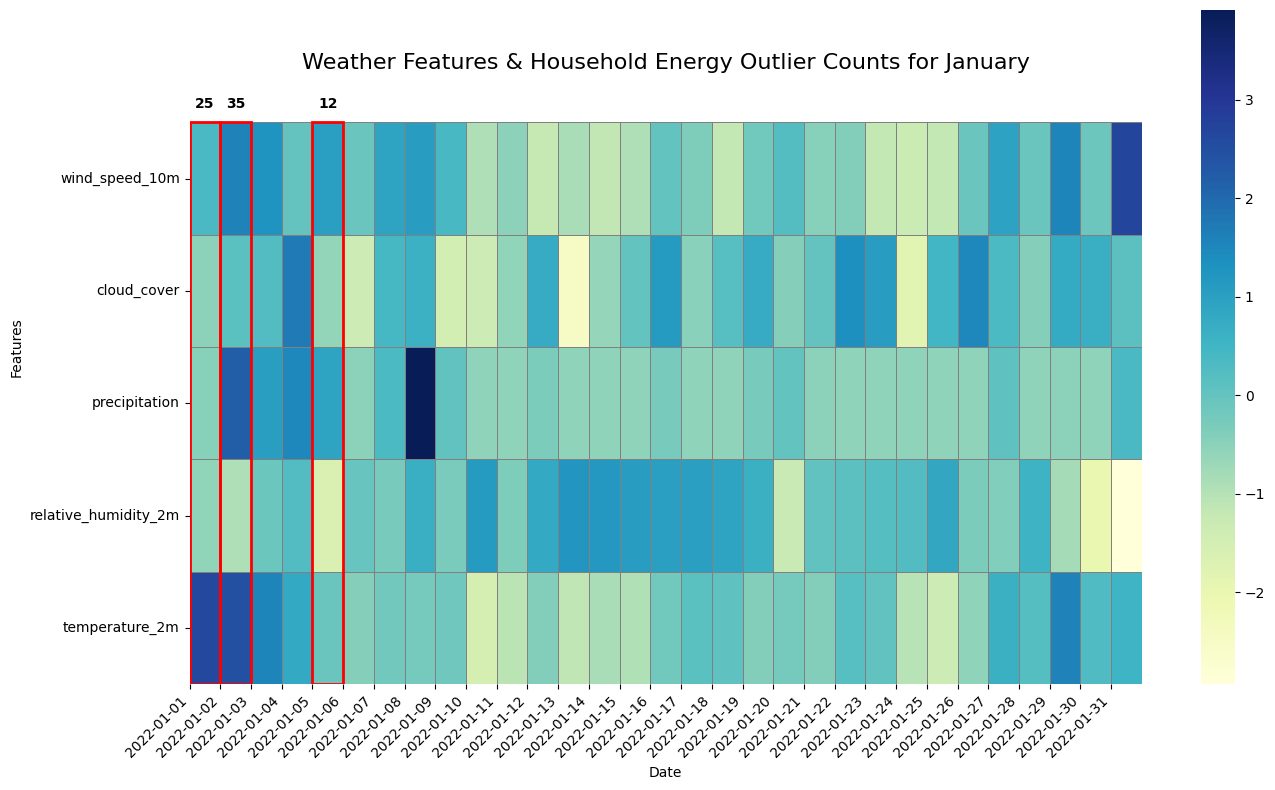

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

def plot_features_with_outlier_counts_on_top(data):
    features = ['temperature_2m', 'relative_humidity_2m', 'precipitation', 'cloud_cover', 'wind_speed_10m']
    subset = data.copy()

    # Ensure Date column is in datetime format for proper labels
    if 'Date' not in subset.columns:
        raise ValueError("The data must include a 'Date' column.")
    subset['Date'] = pd.to_datetime(subset['Date'])

    # Normalize weather features
    for feature in features:
        subset[feature] = (subset[feature] - subset[feature].mean()) / subset[feature].std()

    # Prepare heatmap data
    heat_data = subset[features].T

    plt.figure(figsize=(14, 8))
    ax = plt.gca()

    # Plot heatmap
    sns.heatmap(
        heat_data,
        cmap='YlGnBu',
        cbar=True,
        linewidths=0.5,
        linecolor='gray',
        ax=ax,
        yticklabels=features
    )

    # Determine the maximum y-limit to position text just above
    y_max = len(features)

    # Highlight outlier days with red rectangles and add outlier count above
    outlier_mask = subset['Weather_Outlier_Day'] == 1
    for col_idx, is_outlier in enumerate(outlier_mask):
        if is_outlier:
            # Draw red outline around the column
            rect = mpatches.Rectangle(
                (col_idx, 0),  # Align rectangle to the heatmap rows
                1, len(features),
                linewidth=2,
                edgecolor='red',
                facecolor='none',
                zorder=10
            )
            ax.add_patch(rect)

            # Add outlier count above at y=y_max + some offset
            outlier_count = subset['Energy_Outlier_Day'].iloc[col_idx]
            ax.text(
                col_idx + 0.5, y_max + 0.1,  # position above the heatmap
                str(outlier_count),
                ha='center',
                va='bottom',
                fontsize=10,
                color='black',
                fontweight='bold'
            )

    # Adjust plot limits to make space for the top labels
    ax.set_ylim(0, y_max + 1)

    # Title and labels
    plt.title('Weather Features & Household Energy Outlier Counts for January', fontsize=16,y=0.9)
    plt.xlabel('Date')
    plt.ylabel('Features')

    # Set x-axis to show dates instead of numbers
    ax.set_xticks(range(len(subset['Date'])))
    ax.set_xticklabels(subset['Date'].dt.strftime('%Y-%m-%d'), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


# Example call with your data
plot_features_with_outlier_counts_on_top(subset)


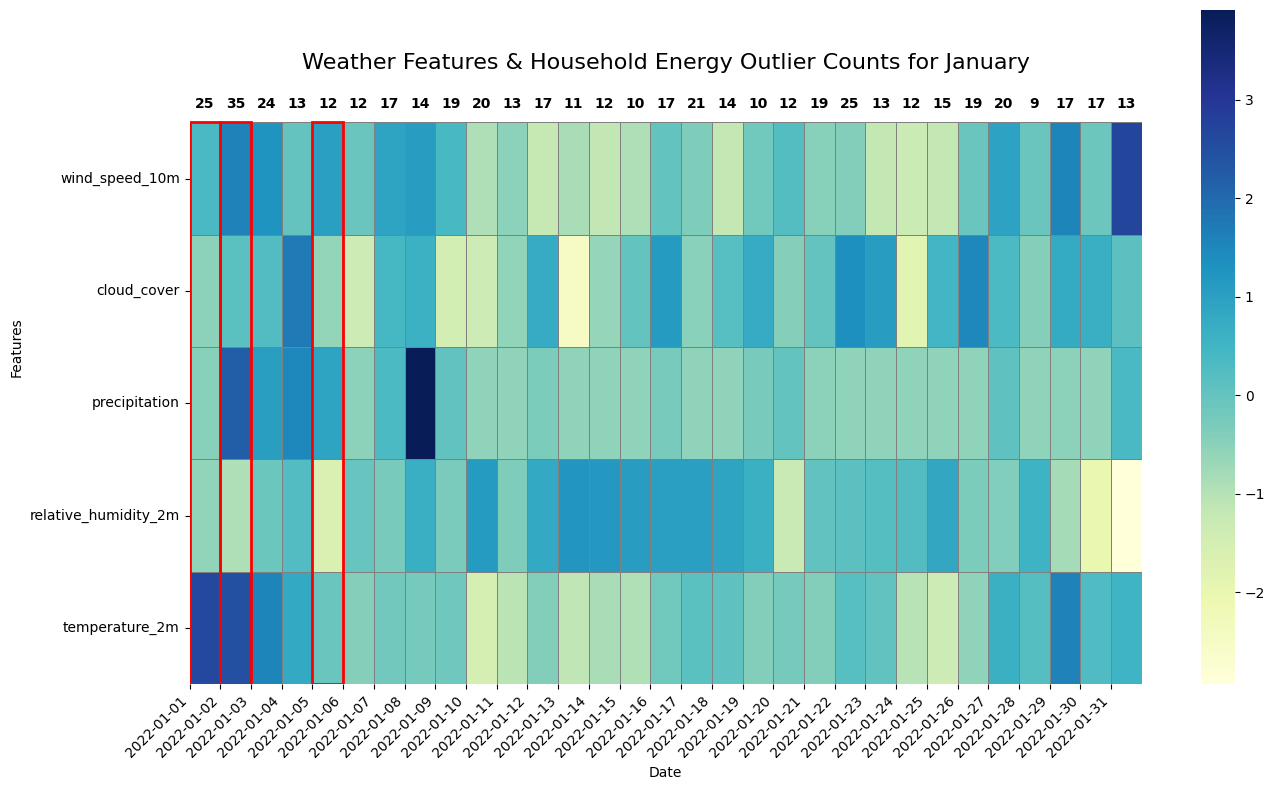

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

def plot_features_with_outlier_counts_on_top(data):
    features = ['temperature_2m', 'relative_humidity_2m', 'precipitation', 'cloud_cover', 'wind_speed_10m']
    subset = data.copy()

    # Ensure Date column is in datetime format for proper labels
    if 'Date' not in subset.columns:
        raise ValueError("The data must include a 'Date' column.")
    subset['Date'] = pd.to_datetime(subset['Date'])

    # Normalize weather features
    for feature in features:
        subset[feature] = (subset[feature] - subset[feature].mean()) / subset[feature].std()

    # Prepare heatmap data
    heat_data = subset[features].T

    plt.figure(figsize=(14, 8))
    ax = plt.gca()

    # Plot heatmap
    sns.heatmap(
        heat_data,
        cmap='YlGnBu',
        cbar=True,
        linewidths=0.5,
        linecolor='gray',
        ax=ax,
        yticklabels=features
    )

    # Determine the maximum y-limit to position text just above
    y_max = len(features)

    # Highlight outlier days with red rectangles
    outlier_mask = subset['Weather_Outlier_Day'] == 1
    for col_idx, is_outlier in enumerate(outlier_mask):
        if is_outlier:
            # Draw red outline around the column
            rect = mpatches.Rectangle(
                (col_idx, 0),  # Align rectangle to the heatmap rows
                1, len(features),
                linewidth=2,
                edgecolor='red',
                facecolor='none',
                zorder=10
            )
            ax.add_patch(rect)

    # Add energy outlier counts for all days
    for col_idx, outlier_count in enumerate(subset['Energy_Outlier_Day']):
        ax.text(
            col_idx + 0.5, y_max + 0.1,  # position above the heatmap
            str(outlier_count),
            ha='center',
            va='bottom',
            fontsize=10,
            color='black',
            fontweight='bold'
        )

    # Adjust plot limits to make space for the top labels
    ax.set_ylim(0, y_max + 1)

    # Title and labels
    plt.title('Weather Features & Household Energy Outlier Counts for January', fontsize=16, y=0.9)
    plt.xlabel('Date')
    plt.ylabel('Features')

    # Set x-axis to show dates instead of numbers
    ax.set_xticks(range(len(subset['Date'])))
    ax.set_xticklabels(subset['Date'].dt.strftime('%Y-%m-%d'), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


# Example call with your data
plot_features_with_outlier_counts_on_top(subset)


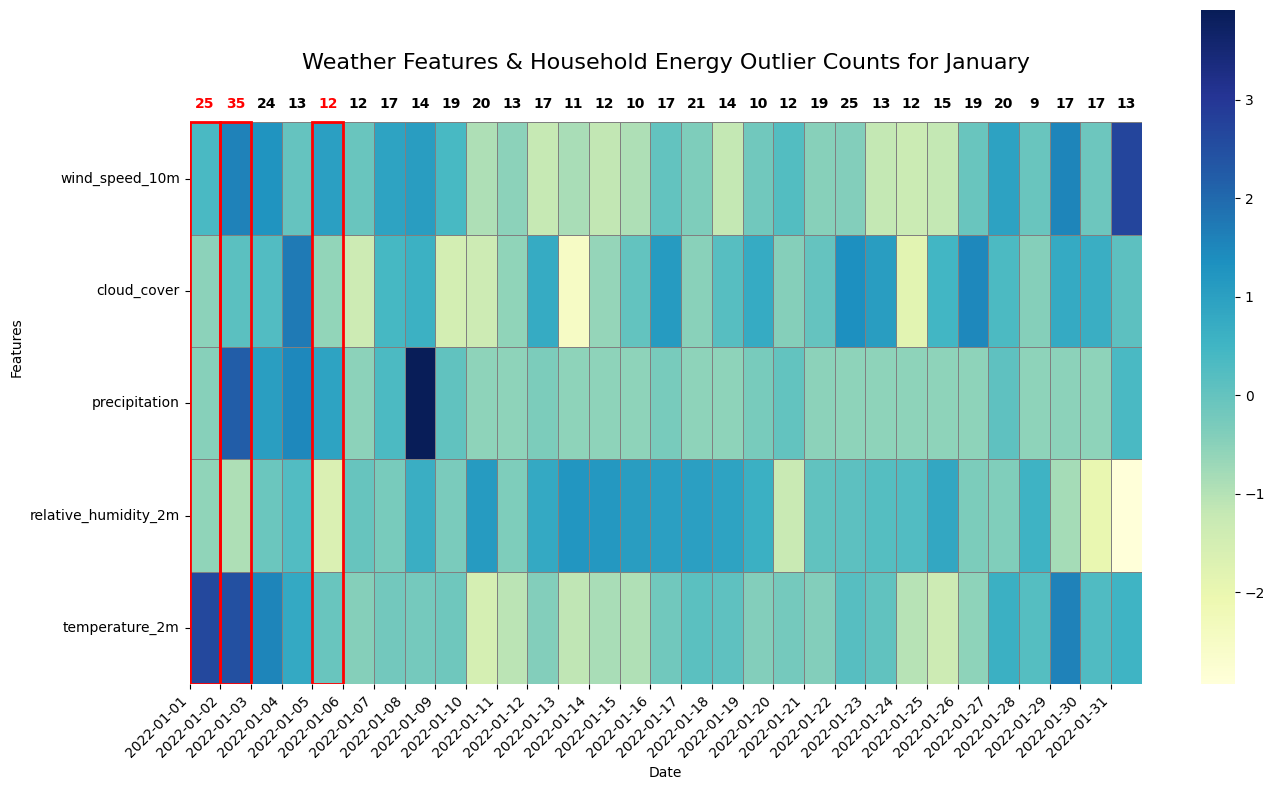

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

def plot_features_with_outlier_counts_on_top(data):
    features = ['temperature_2m', 'relative_humidity_2m', 'precipitation', 'cloud_cover', 'wind_speed_10m']
    subset = data.copy()

    # Ensure Date column is in datetime format for proper labels
    if 'Date' not in subset.columns:
        raise ValueError("The data must include a 'Date' column.")
    subset['Date'] = pd.to_datetime(subset['Date'])

    # Normalize weather features
    for feature in features:
        subset[feature] = (subset[feature] - subset[feature].mean()) / subset[feature].std()

    # Prepare heatmap data
    heat_data = subset[features].T

    plt.figure(figsize=(14, 8))
    ax = plt.gca()

    # Plot heatmap
    sns.heatmap(
        heat_data,
        cmap='YlGnBu',
        cbar=True,
        linewidths=0.5,
        linecolor='gray',
        ax=ax,
        yticklabels=features
    )

    # Determine the maximum y-limit to position text just above
    y_max = len(features)

    # Highlight outlier days with red rectangles
    outlier_mask = subset['Weather_Outlier_Day'] == 1
    for col_idx, is_outlier in enumerate(outlier_mask):
        if is_outlier:
            # Draw red outline around the column
            rect = mpatches.Rectangle(
                (col_idx, 0),  # Align rectangle to the heatmap rows
                1, len(features),
                linewidth=2,
                edgecolor='red',
                facecolor='none',
                zorder=10
            )
            ax.add_patch(rect)

    # Add energy outlier counts for all days, coloring those that overlap with weather outliers
    for col_idx, (outlier_count, is_weather_outlier) in enumerate(zip(subset['Energy_Outlier_Day'], subset['Weather_Outlier_Day'])):
        ax.text(
            col_idx + 0.5, y_max + 0.1,  # position above the heatmap
            str(outlier_count),
            ha='center',
            va='bottom',
            fontsize=10,
            color='red' if is_weather_outlier == 1 else 'black',  # Color red for weather overlap
            fontweight='bold'
        )

    # Adjust plot limits to make space for the top labels
    ax.set_ylim(0, y_max + 1)

    # Title and labels
    plt.title('Weather Features & Household Energy Outlier Counts for January', fontsize=16, y=0.9)
    plt.xlabel('Date')
    plt.ylabel('Features')

    # Set x-axis to show dates instead of numbers
    ax.set_xticks(range(len(subset['Date'])))
    ax.set_xticklabels(subset['Date'].dt.strftime('%Y-%m-%d'), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


# Example call with your data
plot_features_with_outlier_counts_on_top(subset)


More info on Normalization; Normalized.doc in Finder/ Downloads

In [140]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import pandas as pd
# import numpy as np

# def plot_features_with_outlier_counts_on_top(data, month):
#     features = ['temperature_2m', 'relative_humidity_2m', 'precipitation', 'cloud_cover', 'wind_speed_10m']
#     subset = data[data['Month'] == month].copy()

#     # Ensure Date column is in datetime format for proper labels
#     if 'Date' not in subset.columns:
#         raise ValueError("The data must include a 'Date' column.")
#     subset['Date'] = pd.to_datetime(subset['Date'])

#     # Normalize weather features
#     for feature in features:
#         subset[feature] = (subset[feature] - subset[feature].mean()) / subset[feature].std()

#     # Prepare heatmap data
#     heat_data = subset[features].T

#     plt.figure(figsize=(14, 8))
#     ax = plt.gca()

#     # Plot heatmap
#     sns.heatmap(
#         heat_data,
#         cmap='YlGnBu',
#         cbar=True,
#         linewidths=0.5,
#         linecolor='gray',
#         ax=ax,
#         yticklabels=features
#     )

#     # Determine the maximum y-limit to position text just above
#     y_max = len(features)

#     # Highlight outlier days with red rectangles and add outlier count above
#     outlier_mask = subset['Weather_Outlier_Day'] == 1
#     for col_idx, is_outlier in enumerate(outlier_mask):
#         if is_outlier:
#             # Draw red outline around the column
#             rect = mpatches.Rectangle(
#                 (col_idx, 0),  # Align rectangle to the heatmap rows
#                 1, len(features),
#                 linewidth=2,
#                 edgecolor='red',
#                 facecolor='none',
#                 zorder=10
#             )
#             ax.add_patch(rect)

#             # Add outlier count above at y=y_max + some offset
#             outlier_count = subset['Energy_Outlier_Day'].iloc[col_idx]
#             ax.text(
#                 col_idx + 0.5, y_max + 0.1,  # position above the heatmap
#                 str(outlier_count),
#                 ha='center',
#                 va='bottom',
#                 fontsize=10,
#                 color='black',
#                 fontweight='bold'
#             )

#     # Adjust plot limits to make space for the top labels
#     ax.set_ylim(0, y_max + 1)

#     # Title and labels
#     plt.title(f'Weather Features & Household Energy Outlier Counts for Month {month}', fontsize=16, y=0.9)
#     plt.xlabel('Date')
#     plt.ylabel('Features')

#     # Set x-axis to show dates instead of numbers
#     ax.set_xticks(range(len(subset['Date'])))
#     ax.set_xticklabels(subset['Date'].dt.strftime('%Y-%m-%d'), rotation=45, ha='right')

#     plt.tight_layout()
#     plt.show()


# # Main loop to generate plots for all months
# def analyze_all_months(data):
#     # Get unique months in the dataset
#     unique_months = data['Month'].unique()
#     for month in sorted(unique_months):
#         print(f"Generating plot for Month {month}...")
#         plot_features_with_outlier_counts_on_top(data, month)


# # Example call with your dataset
# analyze_all_months(df_energy_per_day)


Generating plot for Month 1...


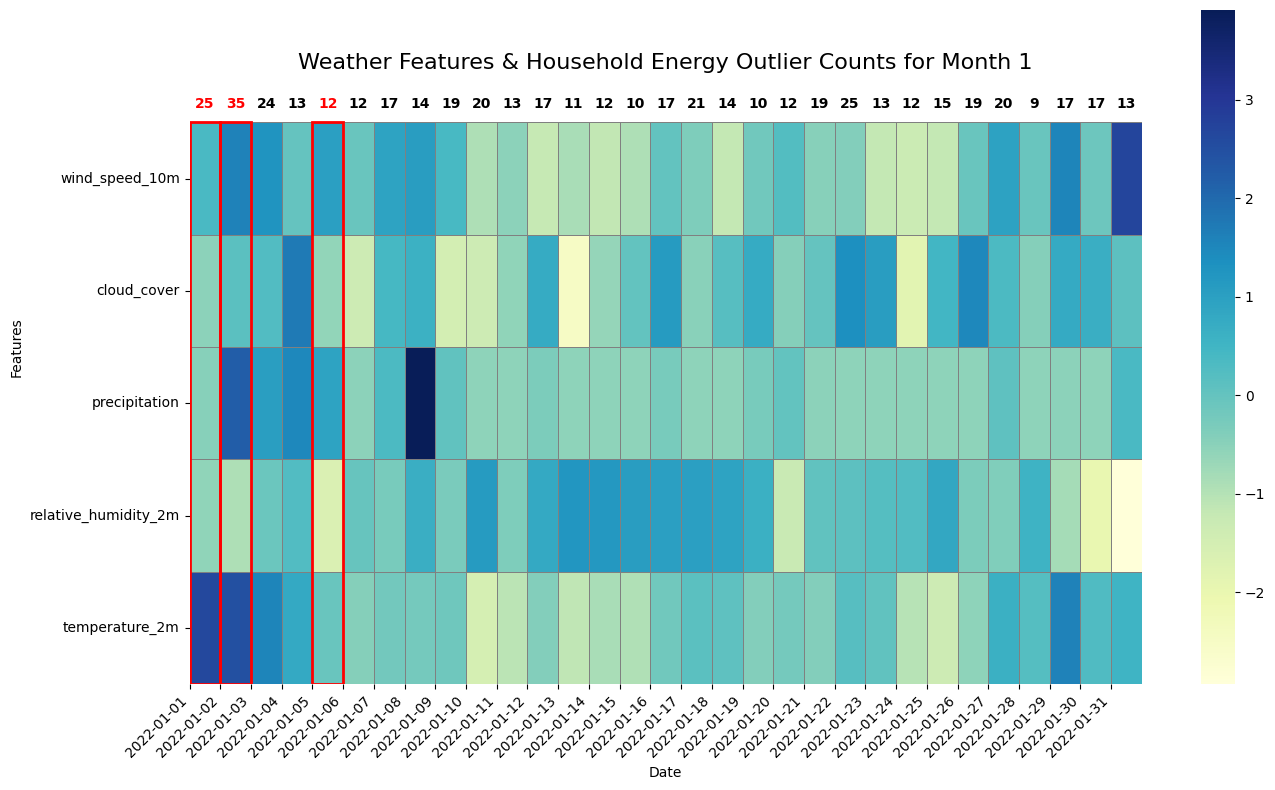

Generating plot for Month 2...


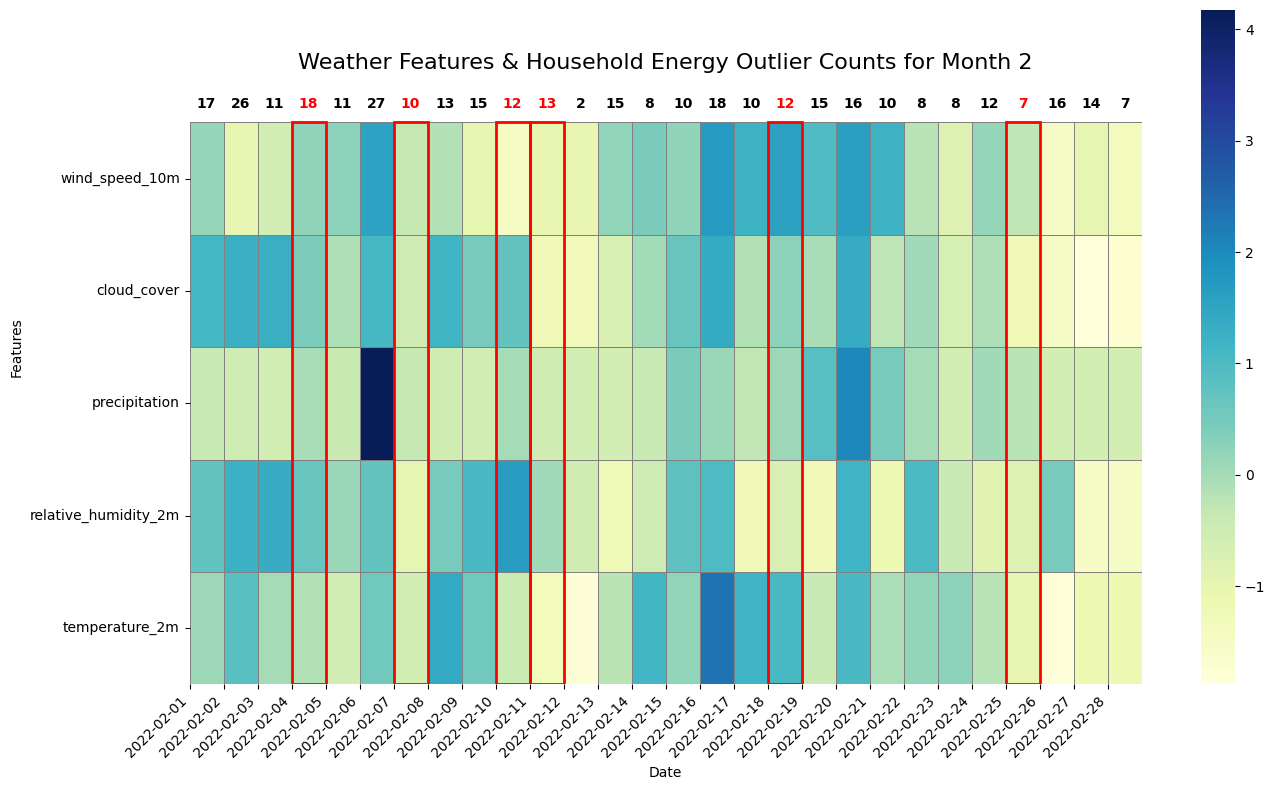

Generating plot for Month 3...


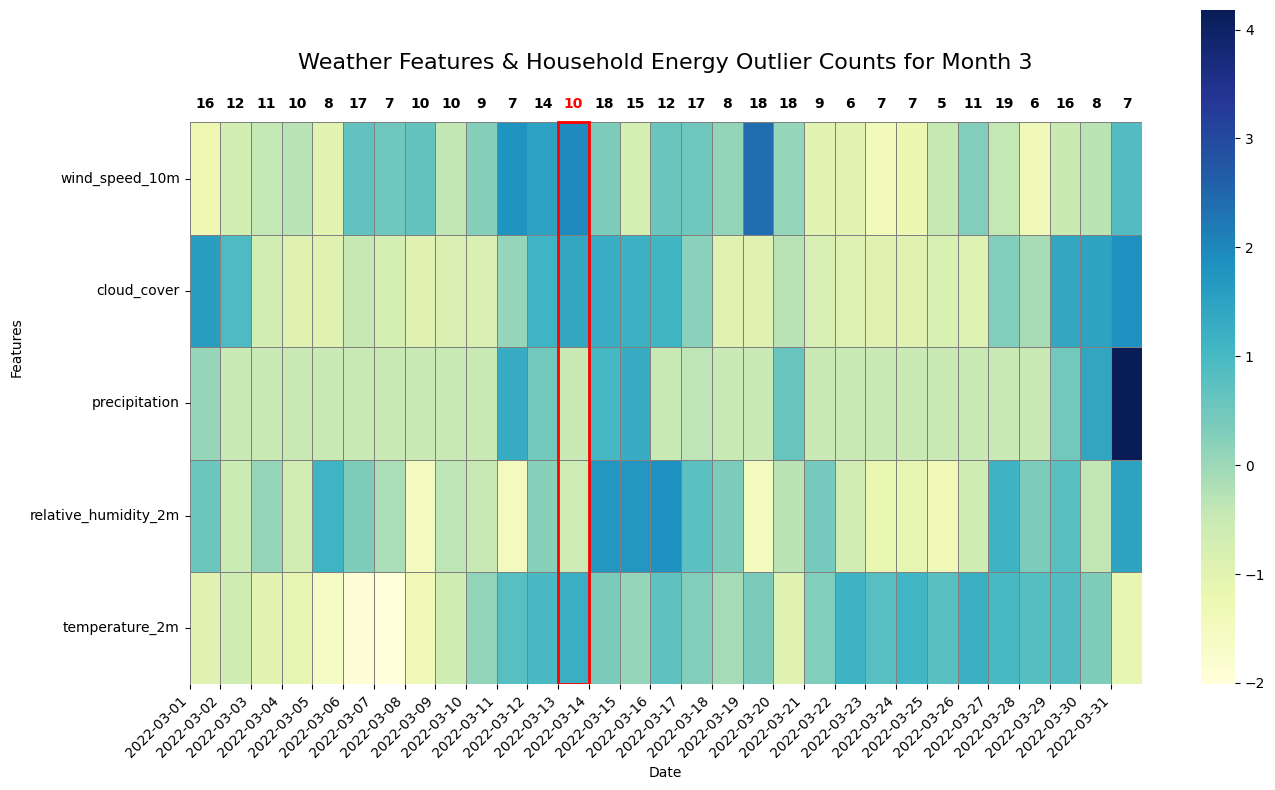

Generating plot for Month 4...


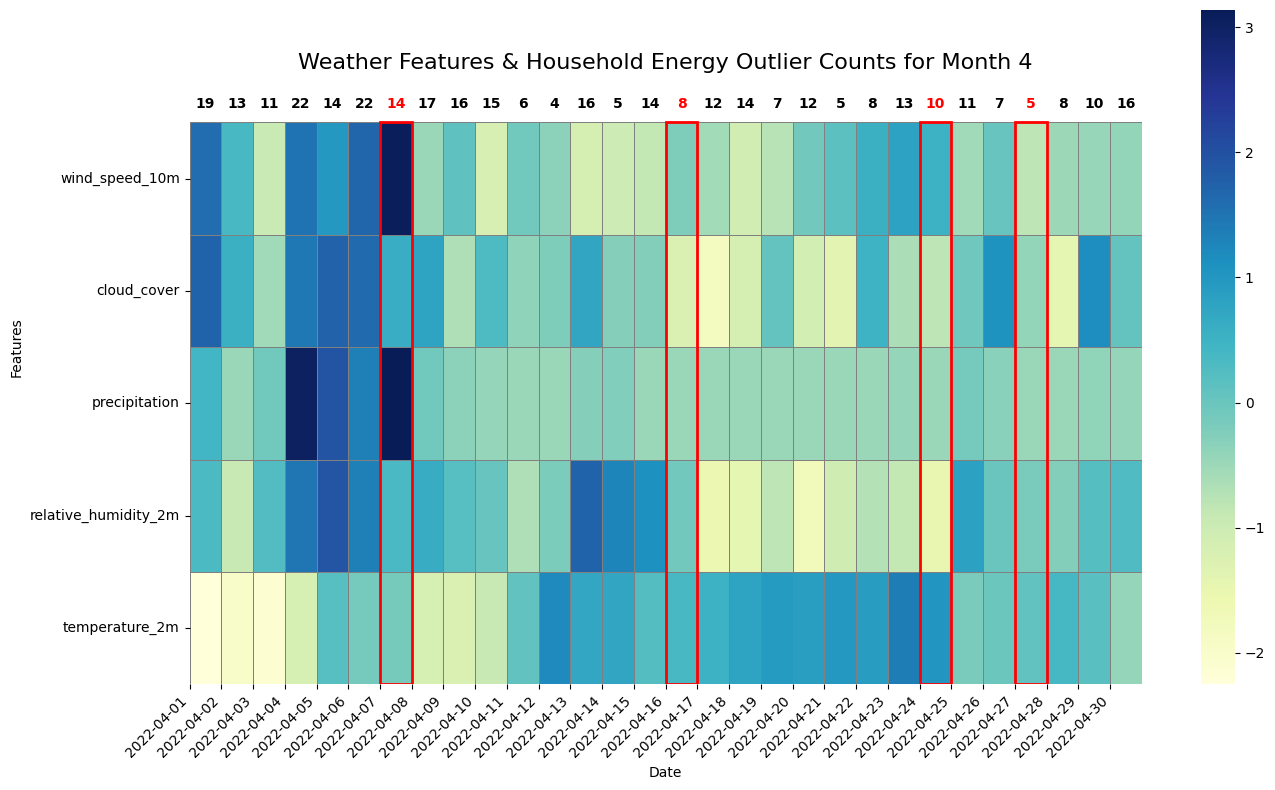

Generating plot for Month 5...


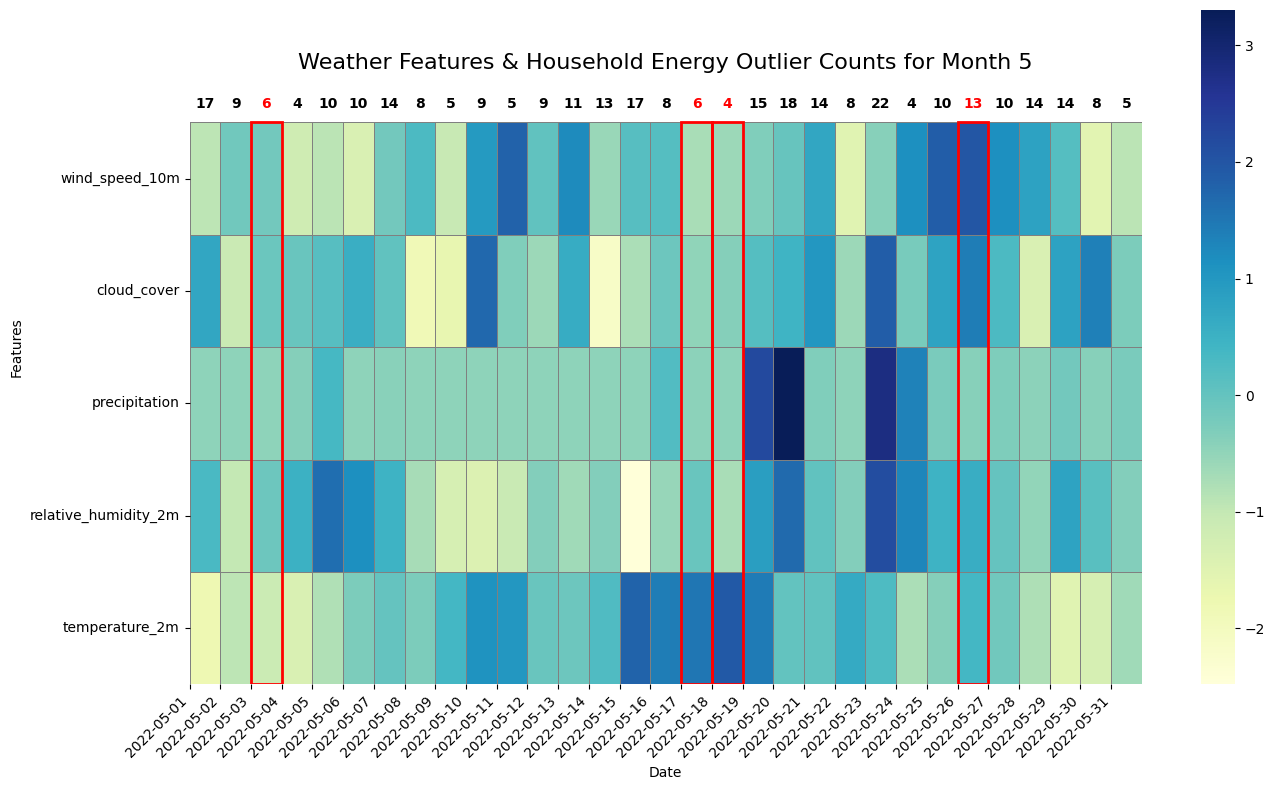

Generating plot for Month 6...


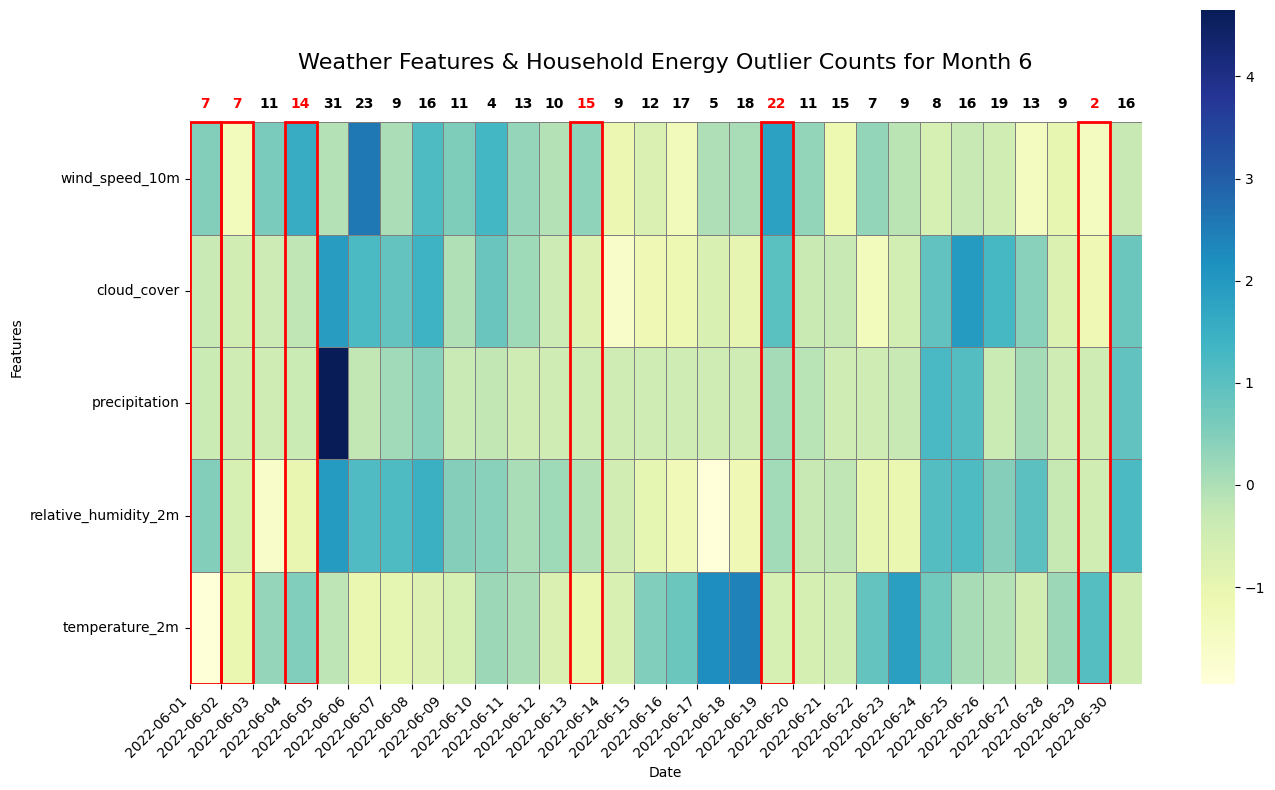

Generating plot for Month 7...


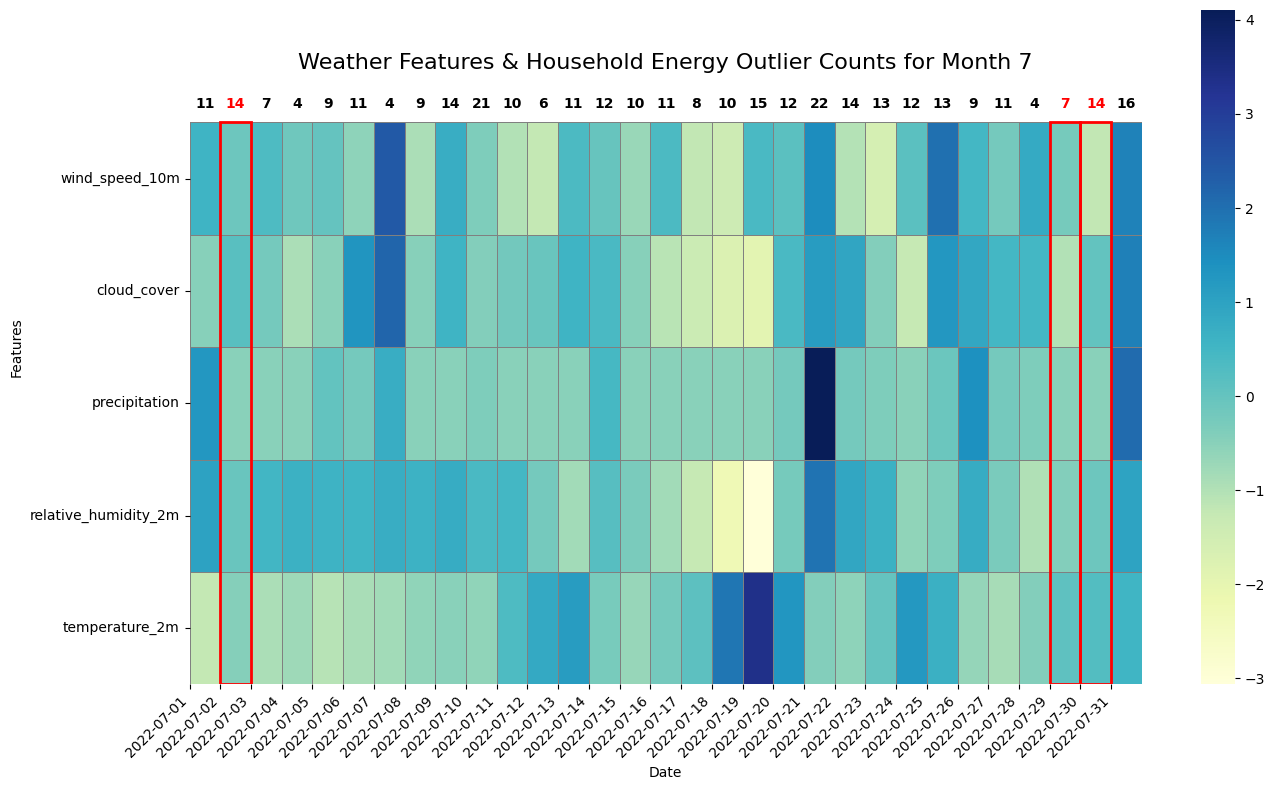

Generating plot for Month 8...


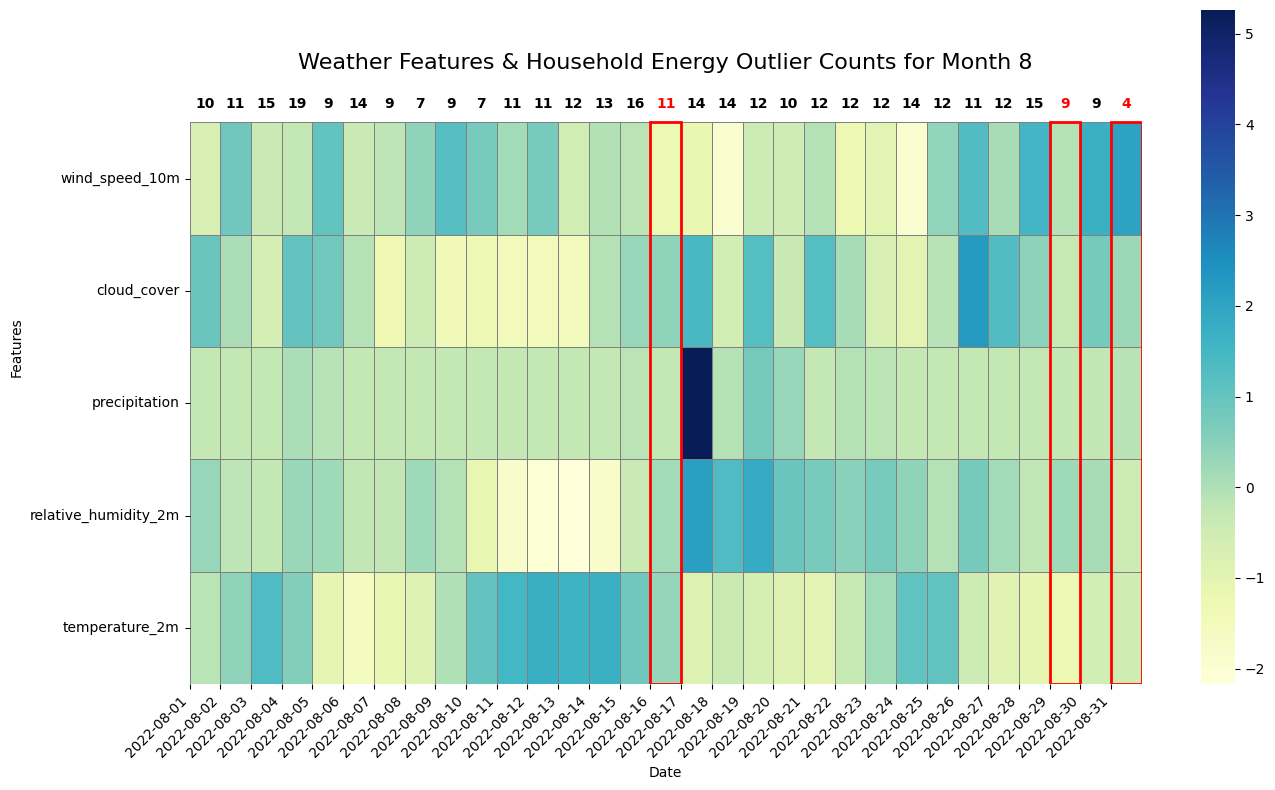

Generating plot for Month 9...


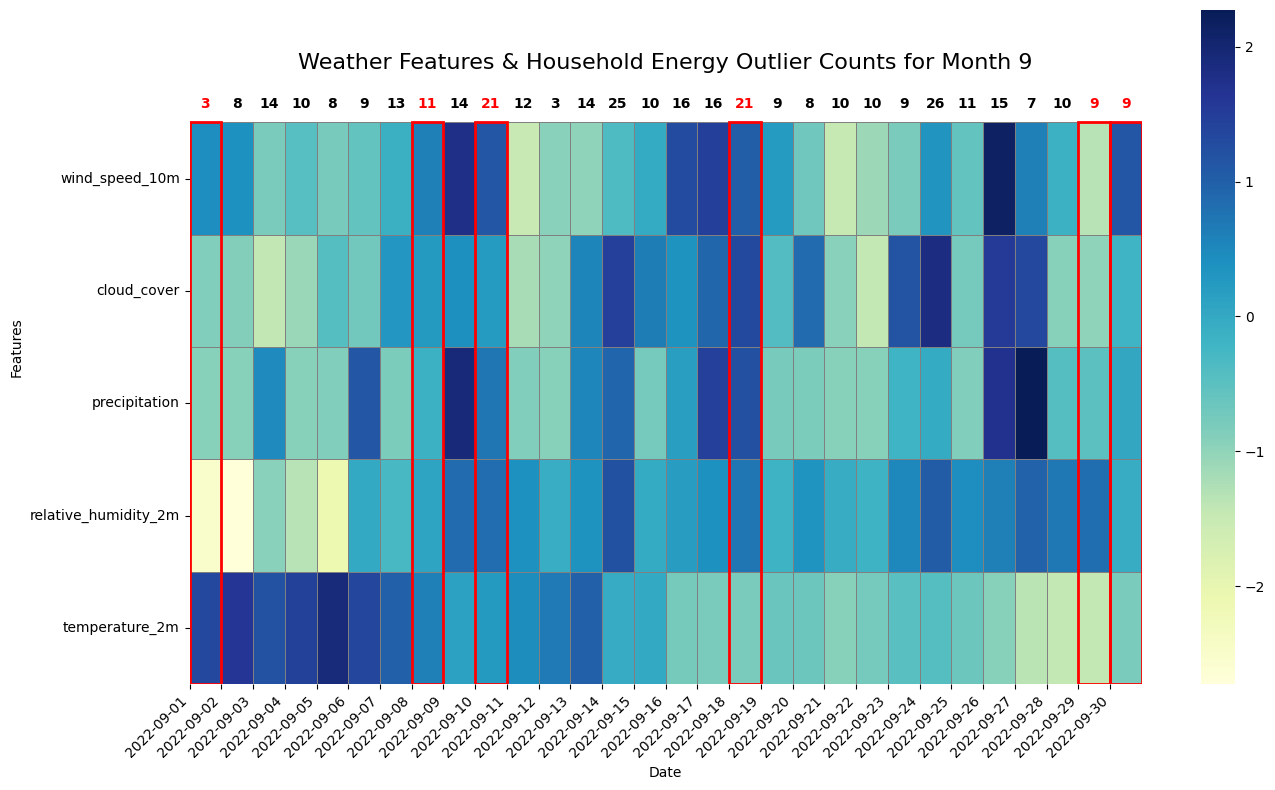

Generating plot for Month 10...


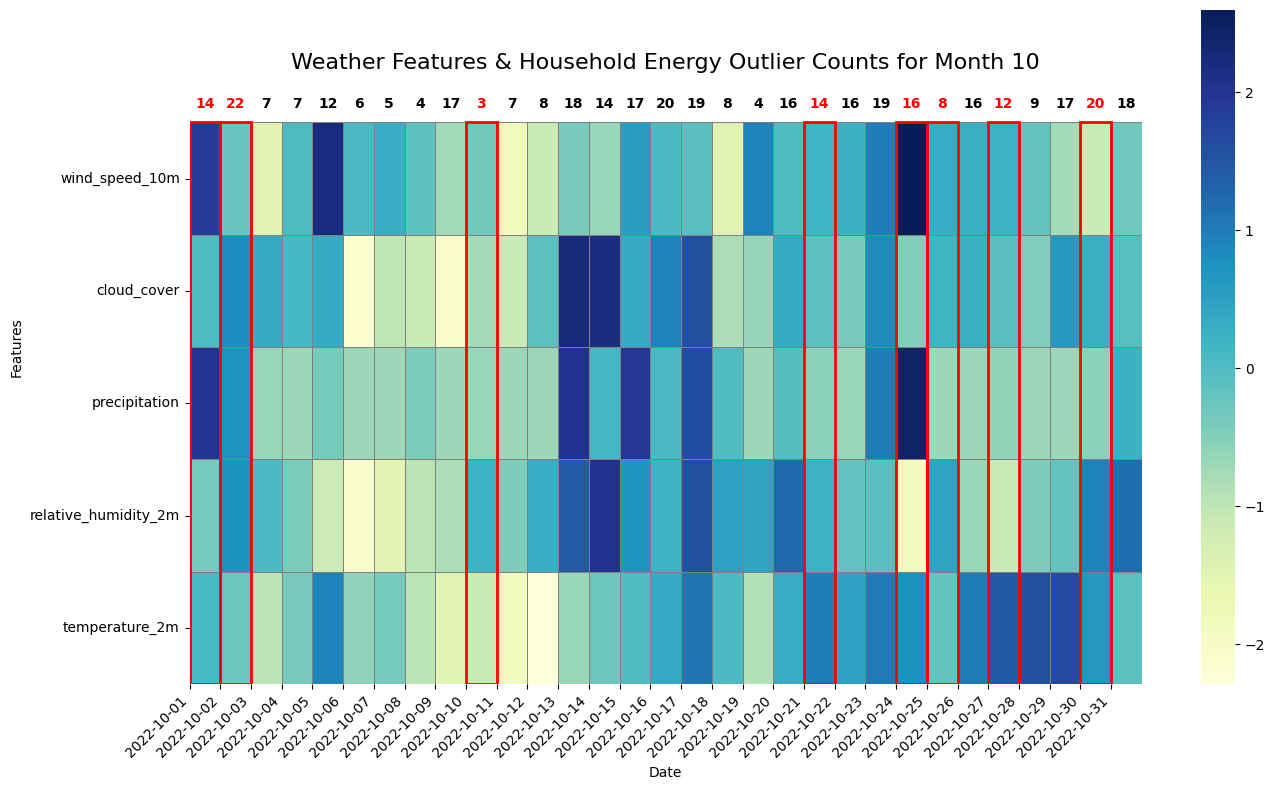

Generating plot for Month 11...


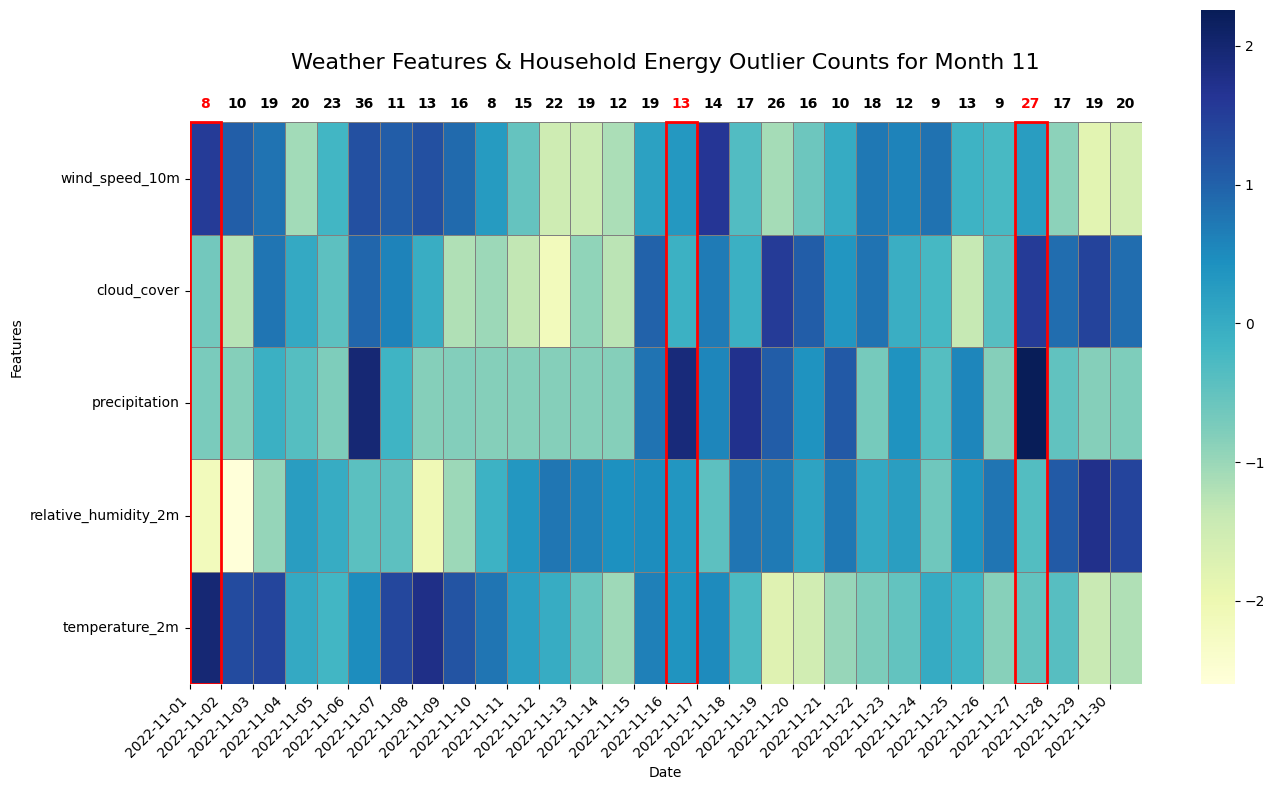

Generating plot for Month 12...


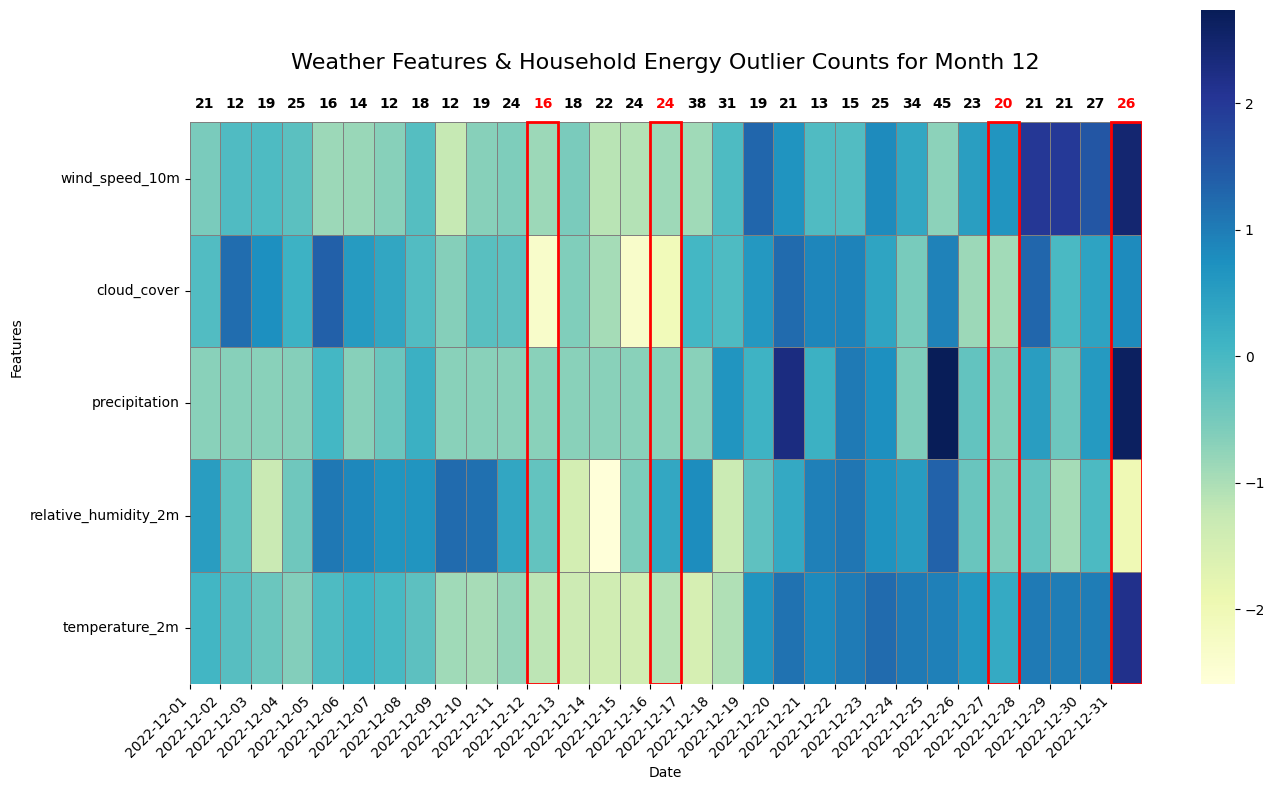

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

def plot_features_with_outlier_counts_on_top(data, month):
    features = ['temperature_2m', 'relative_humidity_2m', 'precipitation', 'cloud_cover', 'wind_speed_10m']
    subset = data[data['Month'] == month].copy()

    # Ensure Date column is in datetime format for proper labels
    if 'Date' not in subset.columns:
        raise ValueError("The data must include a 'Date' column.")
    subset['Date'] = pd.to_datetime(subset['Date'])

    # Normalize weather features
    for feature in features:
        subset[feature] = (subset[feature] - subset[feature].mean()) / subset[feature].std()

    # Prepare heatmap data
    heat_data = subset[features].T

    plt.figure(figsize=(14, 8))
    ax = plt.gca()

    # Plot heatmap
    sns.heatmap(
        heat_data,
        cmap='YlGnBu',
        cbar=True,
        linewidths=0.5,
        linecolor='gray',
        ax=ax,
        yticklabels=features
    )

    # Determine the maximum y-limit to position text just above
    y_max = len(features)

    # Highlight outlier days with red rectangles
    outlier_mask = subset['Weather_Outlier_Day'] == 1
    for col_idx, is_outlier in enumerate(outlier_mask):
        if is_outlier:
            # Draw red outline around the column
            rect = mpatches.Rectangle(
                (col_idx, 0),  # Align rectangle to the heatmap rows
                1, len(features),
                linewidth=2,
                edgecolor='red',
                facecolor='none',
                zorder=10
            )
            ax.add_patch(rect)

    # Add energy outlier counts for all days, coloring those that overlap with weather outliers
    for col_idx, (outlier_count, is_weather_outlier) in enumerate(zip(subset['Energy_Outlier_Day'], subset['Weather_Outlier_Day'])):
        ax.text(
            col_idx + 0.5, y_max + 0.1,  # position above the heatmap
            str(outlier_count),
            ha='center',
            va='bottom',
            fontsize=10,
            color='red' if is_weather_outlier == 1 else 'black',  # Color red for weather overlap
            fontweight='bold'
        )

    # Adjust plot limits to make space for the top labels
    ax.set_ylim(0, y_max + 1)

    # Title and labels
    plt.title(f'Weather Features & Household Energy Outlier Counts for Month {month}', fontsize=16, y=0.9)
    plt.xlabel('Date')
    plt.ylabel('Features')

    # Set x-axis to show dates instead of numbers
    ax.set_xticks(range(len(subset['Date'])))
    ax.set_xticklabels(subset['Date'].dt.strftime('%Y-%m-%d'), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


# Main loop to generate plots for all months
def analyze_all_months(data):
    # Get unique months in the dataset
    unique_months = data['Month'].unique()
    for month in sorted(unique_months):
        print(f"Generating plot for Month {month}...")
        plot_features_with_outlier_counts_on_top(data, month)


# Example call with your dataset
analyze_all_months(df_energy_per_day)


Comparison of Energy Outliers vs. Weather Outliers
Plot side-by-side histograms or density plots:
One for energy outlier days' mean temperatures.
One for weather outlier days' mean temperatures.
Purpose: To see if energy outliers tend to happen on days with similar temperature patterns as weather outliers.

In [ ]:
Plot date vs. mean temperature, with points colored by whether the day is:
a weather outlier,
an energy outlier,
or both.
Purpose: To visualize whether outliers are associated with particular temperature ranges and if there's overlap between weather and energy outliers.
